In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing
import seaborn as sns

In [138]:
path_data = 'data/Economy_Data.csv'
path_target = 'data/HealthAndPoverty_Data.csv'

X = pd.read_csv(path_data, sep=';')
y = pd.read_csv(path_target, sep=';')

# Limpando dados

In [139]:
X = X[~X['Value'].isna()] # dropping all rows with NaN values
y = y[~y['Value'].isna()] # dropping all rows with NaN values

In [4]:
X['SeriesName']

5        Adjusted net national income (constant 2010 US$)
7        Adjusted net national income (constant 2010 US$)
10             Adjusted net national income (current US$)
11             Adjusted net national income (current US$)
12             Adjusted net national income (current US$)
                               ...                       
86490                Use of IMF credit (DOD, current US$)
86491                Use of IMF credit (DOD, current US$)
86492                Use of IMF credit (DOD, current US$)
86493                Use of IMF credit (DOD, current US$)
86494                Use of IMF credit (DOD, current US$)
Name: SeriesName, Length: 60348, dtype: object

## Primeira ideia:
* Feature selection (ver a coluna Series Name - pra depois agrupamento por ano)

## Nova ideia:
* Utilizar os dados em X pra prever cada `SeriesName` de forma separada.
* Aparentemente ha poucos em Y


## ATENCAO 
Adicionei abaixo  uma transformacao das features em onehot, mas ainda nao sei como combinar todas no agg (talvez eu mantenha em sum)

In [5]:
one_hot = pd.get_dummies(X['SeriesName'])
X = X.drop('SeriesName', axis=1)
X = X.join(one_hot)

In [7]:
X.head()

,SeriesCode,CountryName,CountryCode,Year,Value,Adjusted net national income (annual % growth),Adjusted net national income (constant 2010 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2010 US$),...,"Total reserves (includes gold, current US$)",Total reserves in months of imports,Total reserves minus gold (current US$),Trade (% of GDP),Trade in services (% of GDP),"Transport services (% of service exports, BoP)","Transport services (% of service imports, BoP)","Travel services (% of service exports, BoP)","Travel services (% of service imports, BoP)","Use of IMF credit (DOD, current US$)"
5,NY.ADJ.NNTY.KD,Brazil,BRA,1970.0,3.918974e+11,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,NY.ADJ.NNTY.KD,India,IND,1970.0,1.915335e+11,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,NY.ADJ.NNTY.CD,Brazil,BRA,1970.0,3.786021e+10,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,NY.ADJ.NNTY.CD,China,CHN,1970.0,8.525561e+10,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,NY.ADJ.NNTY.CD,India,IND,1970.0,5.776720e+10,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


>- Como ideia aqui sugiro contar o número de análises que foram aplicadas aos países. Contar a incidência de dummies para cada ano, e a partir daí ver a evolução das análises empregadas ao longo do tempo.
>- Outra ideia seria montar um dataframe único onde são agregados os dados de `X` e `y`, cruzando indices históricos de cada nação afim de definir possíveis relações entre as variáveis.

## Resultados
* Ficou horrivel o regressor dessa forma (talvez tenhamos que fazer de maneiras mais simples), e.g.:
    - selecionar um `SeriesName` de X e um de y e criar uma hipotese em cima

## África do Sul
---

In [145]:
X_zaf = X[X['CountryCode'] == 'ZAF'].copy()

In [146]:
y_zaf = y[y['CountryCode'] == 'ZAF'].copy()

## Rússia
---

In [147]:
X_rus = X[X['CountryCode'] == 'RUS'].copy()

In [148]:
y_rus = y[y['CountryCode'] == 'RUS'].copy()

## India
---

In [149]:
X_ind = X[X['CountryCode'] == 'IND'].copy()

In [150]:
y_ind = y[y['CountryCode'] == 'IND'].copy()

## Brasil
---

In [151]:
X_br = X[X['CountryCode'] == 'BRA'].copy()

In [152]:
y_br = y[y['CountryCode'] == 'BRA'].copy()

In [7]:
y_br

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Brazil,BRA,1970.0,77.118400
15,Age dependency ratio (% of working-age populat...,SP.POP.DPND,Brazil,BRA,1970.0,83.980449
20,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,Brazil,BRA,1970.0,6.318839
25,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,Brazil,BRA,1970.0,77.661610
55,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,Brazil,BRA,1970.0,35.116000
...,...,...,...,...,...,...
69210,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,Brazil,BRA,2019.0,0.500000
69305,Probability of dying among adolescents ages 10...,SH.DYN.1014,Brazil,BRA,2019.0,1.400000
69310,Probability of dying among adolescents ages 15...,SH.DYN.1519,Brazil,BRA,2019.0,5.800000
69315,Probability of dying among children ages 5-9 y...,SH.DYN.0509,Brazil,BRA,2019.0,1.000000


In [8]:
test = y_br['SeriesName'].value_counts()
test2 = X_br['SeriesName'].value_counts()

In [53]:
test[test >= 50].index

Index(['Population ages 65 and above (% of total population)',
       'Population ages 20-24, male (% of male population)',
       'Population ages 65 and above, male',
       'Population ages 75-79, male (% of male population)',
       'Population ages 30-34, male (% of male population)',
       'Population ages 30-34, female (% of female population)',
       'Population ages 65 and above, female', 'Population ages 0-14, male',
       'Population ages 0-14, total',
       'Population ages 50-54, male (% of male population)',
       'Population ages 35-39, female (% of female population)',
       'Population ages 05-09, male (% of male population)',
       'Age dependency ratio (% of working-age population)',
       'Population, total',
       'Population ages 15-19, male (% of male population)',
       'Mortality rate, under-5, female (per 1,000 live births)',
       'Population ages 25-29, female (% of female population)',
       'Population ages 0-14, female',
       'Population age

In [98]:
#X_br['SeriesName'].unique()[X_br['SeriesName'].unique().apply(lambda x: 'Adjusted' in x)]

X_br['SeriesName'][X_br['SeriesName'].apply(lambda x: 'per capita' in x)].unique()

array(['Adjusted net national income per capita (constant 2010 US$)',
       'Adjusted net national income per capita (current US$)',
       'GDP per capita (constant 2010 US$)',
       'GDP per capita (constant LCU)', 'GDP per capita (current LCU)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)',
       'GNI per capita (constant 2010 US$)',
       'GNI per capita (constant LCU)', 'GNI per capita (current LCU)',
       'GNI per capita, Atlas method (current US$)',
       'Households and NPISHs Final consumption expenditure per capita (constant 2010 US$)',
       'Households and NPISHs Final consumption expenditure per capita growth (annual %)',
       'Net ODA received per capita (current US$)',
       'Adjusted net national income per capita (annual % growth)',
       'GNI per capita growth (annual %)',
       'GDP per capita, PPP (constant 2017 international $)',
       'GDP per capita, PPP (current international $)',
       'GNI per capita, PPP (constant 2

In [40]:
test2[test2 >= 50].index

Index(['Gross capital formation (current US$)',
       'Total reserves (includes gold, current US$)',
       'Gross national expenditure (% of GDP)',
       'Changes in inventories (constant LCU)', 'GDP (current LCU)',
       'Households and NPISHs Final consumption expenditure (current LCU)',
       'Total reserves minus gold (current US$)',
       'Gross capital formation (% of GDP)',
       'Net primary income (Net income from abroad) (current US$)',
       'Final consumption expenditure (constant 2010 US$)',
       ...
       'Final consumption expenditure (current US$)',
       'Final consumption expenditure (current LCU)',
       'Multilateral debt service (% of public and publicly guaranteed debt service)',
       'Net financial flows, IBRD (NFL, current US$)',
       'External balance on goods and services (% of GDP)',
       'Gross fixed capital formation (current US$)',
       'Gross fixed capital formation (constant LCU)',
       'Gross value added at basic prices (GVA) (cur

In [47]:
cobert_hiv_treatment = y_br[y_br['SeriesName'] == 'Antiretroviral therapy coverage (% of people living with HIV)']

In [25]:
gva = X_br[X_br['SeriesName'] ==  'Gross value added at basic prices (GVA) (current US$)']


In [27]:
gva.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
775,Gross value added at basic prices (GVA) (curre...,NY.GDP.FCST.CD,Brazil,BRA,1970.0,3.556752e+10
2505,Gross value added at basic prices (GVA) (curre...,NY.GDP.FCST.CD,Brazil,BRA,1971.0,4.214448e+10
4235,Gross value added at basic prices (GVA) (curre...,NY.GDP.FCST.CD,Brazil,BRA,1972.0,4.986391e+10
5965,Gross value added at basic prices (GVA) (curre...,NY.GDP.FCST.CD,Brazil,BRA,1973.0,6.793320e+10
7695,Gross value added at basic prices (GVA) (curre...,NY.GDP.FCST.CD,Brazil,BRA,1974.0,9.137394e+10


In [85]:
working_age = y_br[y_br['SeriesName'] == 'Age dependency ratio, young (% of working-age population)'].copy()

In [13]:
infant_deaths = y_br[y_br['SeriesName'] == 'Number of infant deaths'].copy()

In [100]:
gni_pcapita_growth = X_br[X_br['SeriesName'] == 'GNI per capita growth (annual %)']

In [83]:
gni_per_capita = X_br[X_br['SeriesName'] == 'GNI per capita, PPP (constant 2017 international $)'].copy()

In [14]:
norm = preprocessing.MinMaxScaler()

In [33]:
infant_deaths_norm = infant_deaths['Value'].values
infant_deaths_norm = norm.fit_transform(infant_deaths_norm.reshape(-1,1))

gva_norm  = gva['Value'].values
gva_norm = norm.fit_transform(gva_norm.reshape(-1,1))

In [34]:
infant_deaths['norm'] = infant_deaths_norm
gva['norm'] = gva_norm

<ipython-input-34-02148d55c3d1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
fig = go.Figure()
fig.add_trace(go.Bar(x = infant_deaths['Year'], y = infant_deaths['norm'], name= 'infant_deaths', hovertemplate="Deaths: %{y}<extra></extra>"))
fig.add_trace(go.Bar(x = gva['Year'], y = gva['norm'], name= 'GVA'))
fig.add_trace(go.Bar(x = cobert_hiv_treatment['Year'], y = cobert_hiv_treatment['Value']/100, name = 'HIV coverage',hovertemplate = 'Coverage: %{y}<extra></extra>'))

In [125]:
working_age = working_age.merge(gni_pcapita_growth, on = 'Year', how = 'right')

In [126]:
working_age

,SeriesName_x,SeriesCode_x,CountryName_x,CountryCode_x,Year,Value_x,SeriesName_y,SeriesCode_y,CountryName_y,CountryCode_y,Value_y
0,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,Brazil,BRA,1971.0,76.588746,GNI per capita growth (annual %),NY.GNP.PCAP.KD.ZG,Brazil,BRA,8.975421
1,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,Brazil,BRA,1972.0,75.482549,GNI per capita growth (annual %),NY.GNP.PCAP.KD.ZG,Brazil,BRA,9.670938
2,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,Brazil,BRA,1973.0,74.318919,GNI per capita growth (annual %),NY.GNP.PCAP.KD.ZG,Brazil,BRA,10.937734
3,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,Brazil,BRA,1974.0,73.061335,GNI per capita growth (annual %),NY.GNP.PCAP.KD.ZG,Brazil,BRA,6.901292
4,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,Brazil,BRA,1975.0,71.724512,GNI per capita growth (annual %),NY.GNP.PCAP.KD.ZG,Brazil,BRA,2.177873
5,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,Brazil,BRA,1976.0,70.518361,GNI per capita growth (annual %),NY.GNP.PCAP.KD.ZG,Brazil,BRA,6.999470
6,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,Brazil,BRA,1977.0,69.321616,GNI per capita growth (annual %),NY.GNP.PCAP.KD.ZG,Brazil,BRA,1.983963
7,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,Brazil,BRA,1978.0,68.137142,GNI per capita growth (annual %),NY.GNP.PCAP.KD.ZG,Brazil,BRA,0.122624
8,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,Brazil,BRA,1979.0,66.979679,GNI per capita growth (annual %),NY.GNP.PCAP.KD.ZG,Brazil,BRA,3.907551
9,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,Brazil,BRA,1980.0,65.869792,GNI per capita growth (annual %),NY.GNP.PCAP.KD.ZG,Brazil,BRA,5.962585


In [78]:
import statsmodels.api as sm
from scipy import stats

hipot_X = infant_deaths['Value'].iloc[:]
hipot_y = gva['Value'].iloc[:]

hipot_X = hipot_X.reset_index(drop=True)
hipot_y = hipot_y.reset_index(drop=True)

est = sm.OLS(hipot_y, hipot_X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.108
Model:                            OLS   Adj. R-squared (uncentered):              0.090
Method:                 Least Squares   F-statistic:                              5.944
Date:                Thu, 29 Jul 2021   Prob (F-statistic):                      0.0184
Time:                        16:17:17   Log-Likelihood:                         -1448.2
No. Observations:                  50   AIC:                                      2898.
Df Residuals:                      49   BIC:                                      2900.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

>- A partir dessas informações é possivel refutar a hipotese nula;

<AxesSubplot:xlabel='Value', ylabel='Value'>

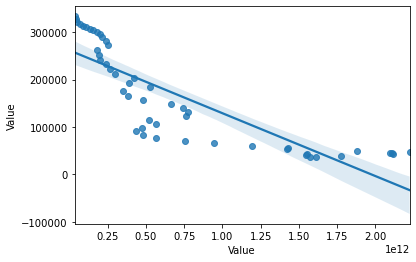

In [54]:
sns.regplot(x = gva['Value'], y = infant_deaths['Value'])